In [38]:
import numpy as np
import pandas as pd
df=pd.read_csv('C:/Users/NON/Desktop/Data science/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [39]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [40]:
df.Type.unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [41]:
df.Type.nunique()

3

In [42]:
print('Paid App',len(df[df['Type']=='Paid']))
print('Free App',len(df[df['Type']=='Free']))

Paid App 800
Free App 10039


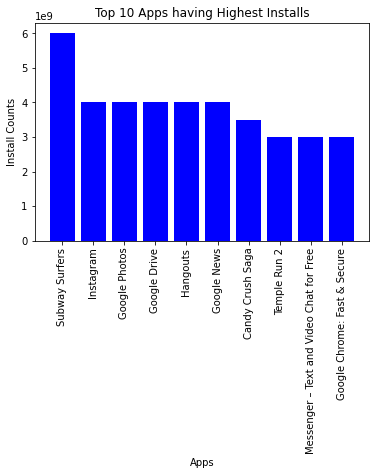

In [53]:
import matplotlib.pyplot as plt
df['Installs'] = df['Installs'].str.replace('+','').str.replace(',','').astype(int)
i = df[df['Category'] == '1.9'].index
df.loc[i]
df = df.drop(i)


res = df.groupby('App')['Installs'].sum().reset_index()
final_result = res.sort_values(by = 'Installs', ascending = False).head(10)


plt.bar("App", "Installs", data = final_result, color = "blue")
plt.xlabel("Apps")
plt.xticks(rotation = 90)
plt.ylabel("Install Counts")
plt.title("Top 10 Apps having Highest Installs")
plt.show()

In [44]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [46]:
temp=df.isnull().sum()
temp

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [47]:
temp=(temp/df.shape[0])*100
temp

App                0.000000
Category           0.000000
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.009224
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.027673
dtype: float64

In [48]:
t_df=df[pd.notnull(df['Rating'])]
t_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9367 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9367 non-null   object 
 1   Category        9367 non-null   object 
 2   Rating          9367 non-null   float64
 3   Reviews         9367 non-null   object 
 4   Size            9367 non-null   object 
 5   Installs        9367 non-null   object 
 6   Type            9367 non-null   object 
 7   Price           9367 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9367 non-null   object 
 10  Last Updated    9367 non-null   object 
 11  Current Ver     9363 non-null   object 
 12  Android Ver     9364 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


Values of mean meadian and mode 4.193338315362448 4.3 4.4


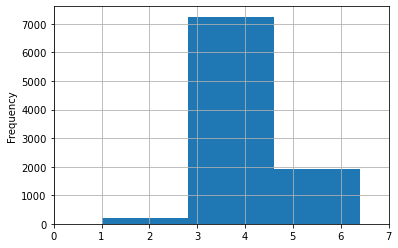

In [49]:
import scipy.stats as sc
t_mean=np.mean(t_df['Rating'])
t_median=np.median(t_df['Rating'])
t_mode=sc.mode(t_df['Rating'])
print('Values of mean meadian and mode',t_mean,t_median,t_mode[0][0])
df['Rating'].plot(kind='hist')
plt.grid()
plt.xlim(0,7)
plt.show()

In [50]:
df['Rating'].fillna(t_median,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [51]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [52]:
temp=df.duplicated().value_counts()
temp
temp=(temp/df.shape[0])*100
temp

False    95.539754
True      4.460246
dtype: float64

In [54]:
df.drop_duplicates(inplace=True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10346 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10346 non-null  object 
 1   Category        10346 non-null  object 
 2   Rating          10346 non-null  float64
 3   Reviews         10346 non-null  object 
 4   Size            10346 non-null  object 
 5   Installs        10346 non-null  int32  
 6   Type            10346 non-null  object 
 7   Price           10346 non-null  object 
 8   Content Rating  10346 non-null  object 
 9   Genres          10346 non-null  object 
 10  Last Updated    10346 non-null  object 
 11  Current Ver     10346 non-null  object 
 12  Android Ver     10346 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.1+ MB


In [56]:
df.describe()

,Rating,Installs
count,10346.00000,1.034600e+04
mean,4.20377,1.417266e+07
std,0.48573,8.028090e+07
min,1.00000,0.000000e+00
25%,4.10000,1.000000e+03
50%,4.30000,1.000000e+05
75%,4.50000,1.000000e+06
max,5.00000,1.000000e+09


In [57]:
df['Last Updated']=pd.to_datetime(df['Last Updated'])
df['Days before updated']=(df['Last Updated'].max()-df['Last Updated'])

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10346 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   App                  10346 non-null  object         
 1   Category             10346 non-null  object         
 2   Rating               10346 non-null  float64        
 3   Reviews              10346 non-null  object         
 4   Size                 10346 non-null  object         
 5   Installs             10346 non-null  int32          
 6   Type                 10346 non-null  object         
 7   Price                10346 non-null  object         
 8   Content Rating       10346 non-null  object         
 9   Genres               10346 non-null  object         
 10  Last Updated         10346 non-null  datetime64[ns] 
 11  Current Ver          10346 non-null  object         
 12  Android Ver          10346 non-null  object         
 13  Days before upda

In [59]:
df['Reviews']=df['Reviews'].astype(int)

In [60]:
df['Price']=df['Price'].str.replace('$','').astype(float)

In [63]:
df['Size'].describe()

count                  10346
unique                   457
top       Varies with device
freq                    1525
Name: Size, dtype: object

In [66]:
df['Size']=df['Size'].str.replace('Varies with device','0').str.replace('M','e+6').str.replace('k','e+3').astype(float)

In [67]:
df.describe()

,Rating,Reviews,Size,Installs,Price,Days before updated
count,10346.00000,1.034600e+04,1.034600e+04,1.034600e+04,10346.000000,10346
mean,4.20377,4.063338e+05,1.816602e+07,1.417266e+07,1.031561,266 days 09:08:14.799922
std,0.48573,2.698179e+06,2.214556e+07,8.028090e+07,16.287252,398 days 09:11:37.912373
min,1.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0 days 00:00:00
25%,4.10000,3.200000e+01,2.700000e+06,1.000000e+03,0.000000,20 days 00:00:00
50%,4.30000,1.688500e+03,9.100000e+06,1.000000e+05,0.000000,80 days 00:00:00
75%,4.50000,4.659825e+04,2.600000e+07,1.000000e+06,0.000000,337 days 18:00:00
max,5.00000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000,3001 days 00:00:00


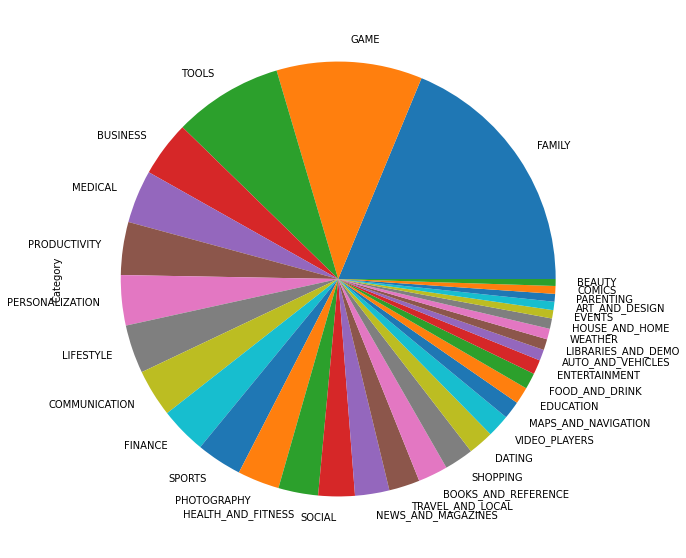

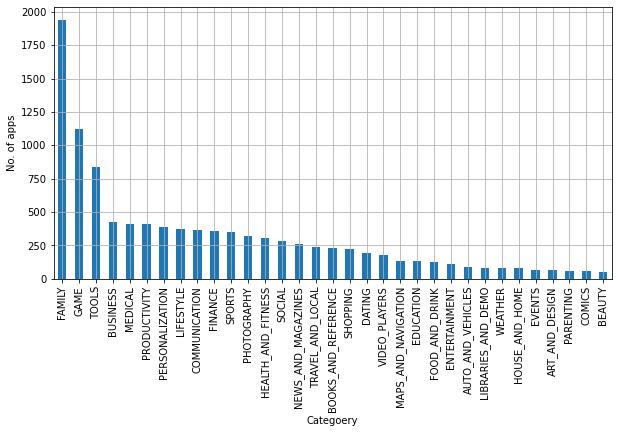

In [69]:
plt.figure(figsize=(10,10))
df['Category'].value_counts().plot(kind='pie')
plt.figure(figsize=(10,5))
df['Category'].value_counts().plot(kind='bar')
plt.xlabel('Categoery')
plt.ylabel('No. of apps')
plt.grid()
plt.show()

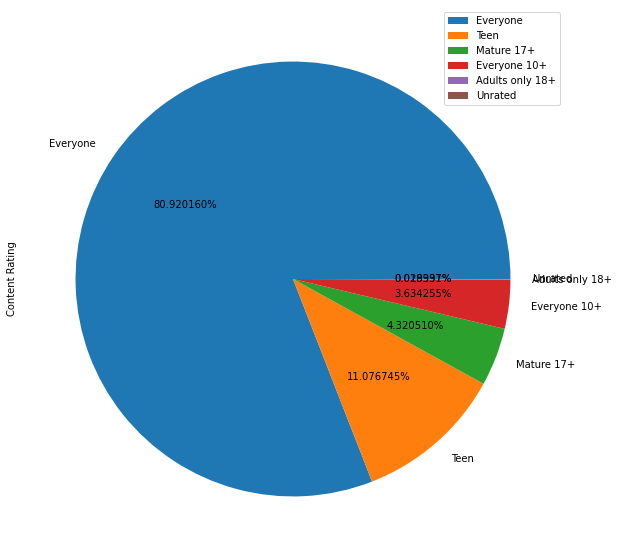

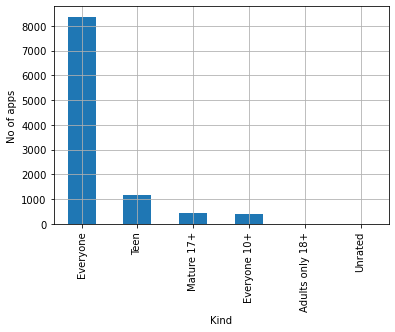

In [80]:
plt.figure(figsize=(10,10))
df['Content Rating'].value_counts().plot(kind='pie',autopct='%F%%')
plt.legend()
plt.show()
df['Content Rating'].value_counts().plot(kind='bar')
plt.xlabel('Kind')
plt.ylabel('No of apps')
plt.grid()
plt.show()

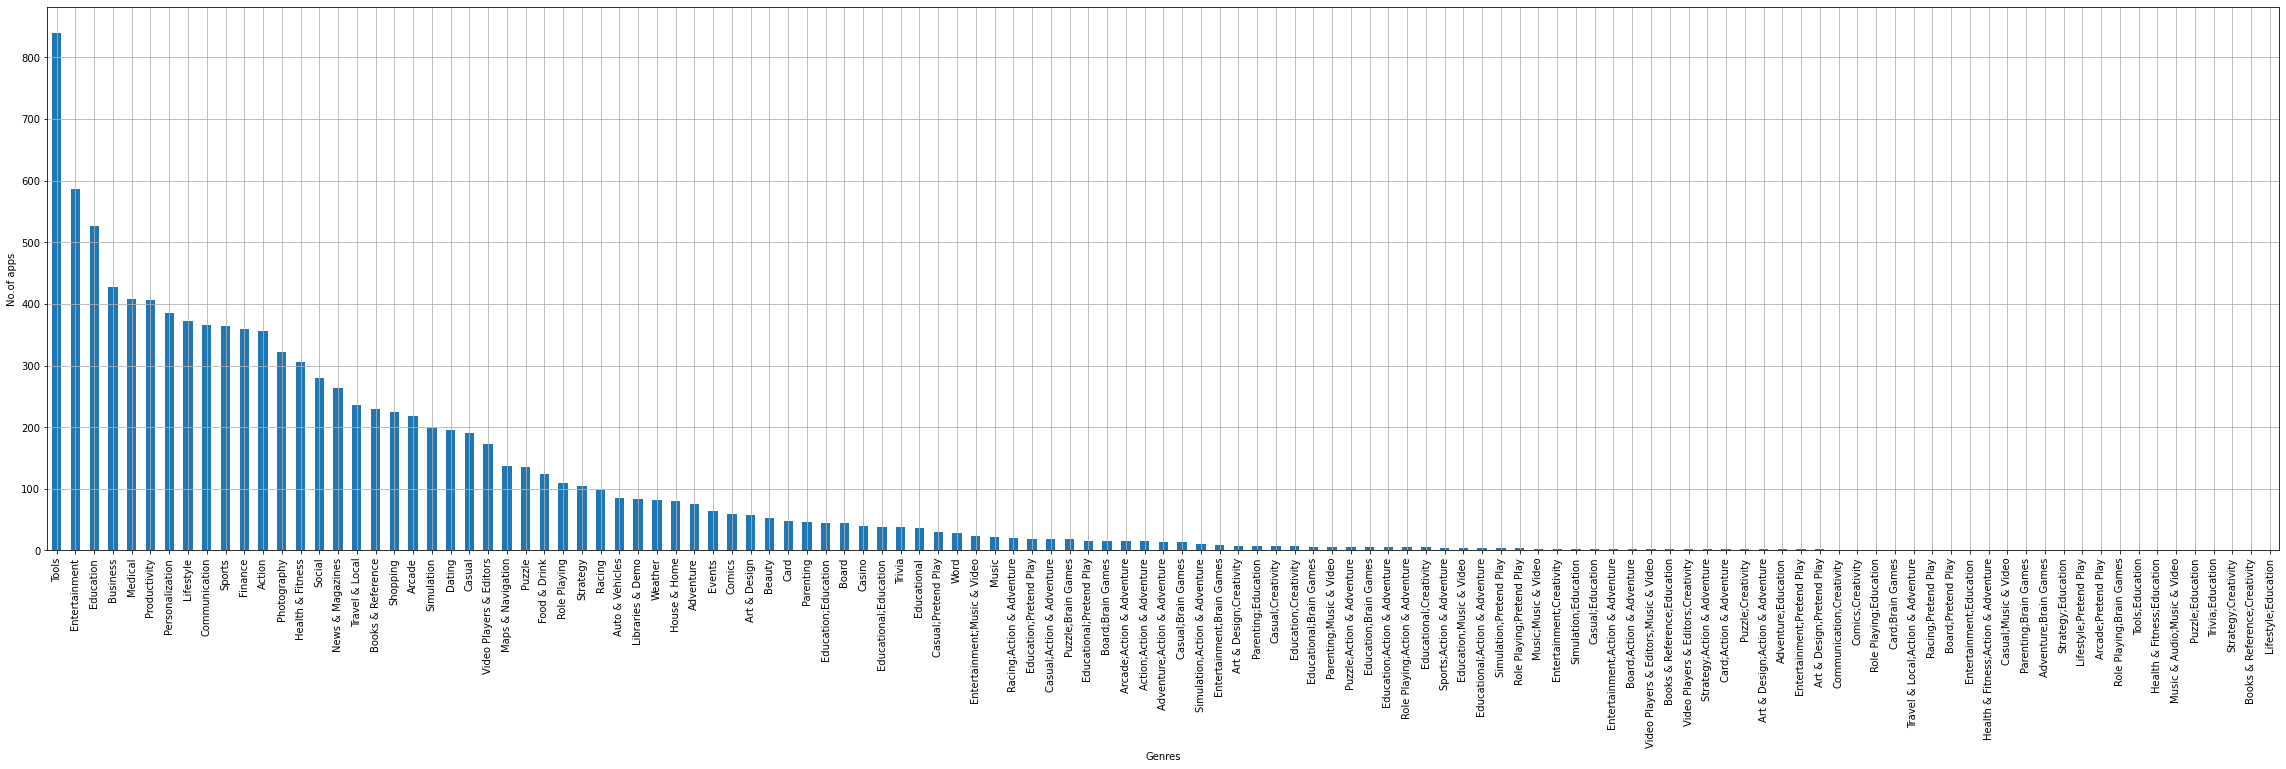

In [81]:
plt.figure(figsize=(40,10))
df['Genres'].value_counts().plot(kind='bar')
plt.grid()
plt.xlabel('Genres')
plt.ylabel('No.of apps')
plt.show()

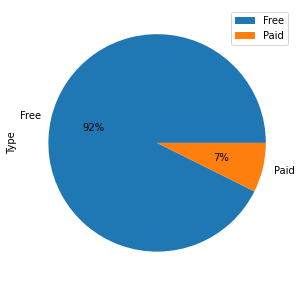

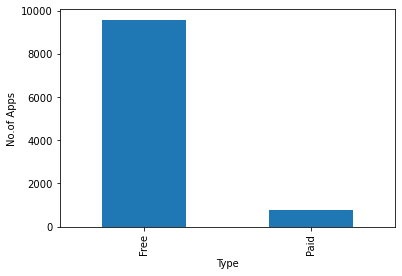

In [86]:
plt.figure(figsize=(5,5))
df['Type'].value_counts().plot(kind='pie',autopct='%i%%')
plt.legend()
plt.show()
df['Type'].value_counts().plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('No.of Apps')
plt.show()

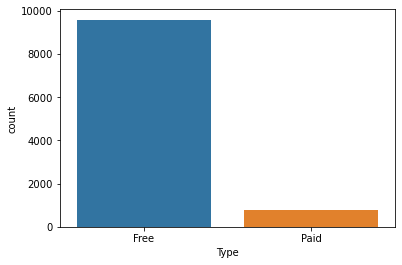

In [90]:
import seaborn as sns
sns.countplot(df['Type'],data=df)

In [101]:
df[df['Size']==df['Size'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Days before updated
1080,Post Bank,FINANCE,4.5,60449,100000000.0,1000000,Free,0.00,Everyone,Finance,2018-07-23,2.9.12,4.0 and up,16 days
1565,Talking Babsy Baby: Baby Games,LIFESTYLE,4.0,140995,100000000.0,10000000,Free,0.00,Everyone,Lifestyle;Pretend Play,2018-07-16,9.0,4.0 and up,23 days
1758,Hungry Shark Evolution,GAME,4.5,6074334,100000000.0,100000000,Free,0.00,Teen,Arcade,2018-07-25,6.0.0,4.1 and up,14 days
1793,Mini Golf King - Multiplayer Game,GAME,4.5,531458,100000000.0,5000000,Free,0.00,Everyone,Sports,2018-07-20,3.04.1,4.0.3 and up,19 days
1988,Hungry Shark Evolution,GAME,4.5,6074627,100000000.0,100000000,Free,0.00,Teen,Arcade,2018-07-25,6.0.0,4.1 and up,14 days
2299,Navi Radiography Pro,MEDICAL,4.7,11,100000000.0,500,Paid,15.99,Everyone,Medical,2018-01-14,1.2.0,4.0.3 and up,206 days
3973,Hungry Shark Evolution,GAME,4.5,6071542,100000000.0,100000000,Free,0.00,Teen,Arcade,2018-07-25,6.0.0,4.1 and up,14 days
4690,Vi Trainer,HEALTH_AND_FITNESS,3.6,124,100000000.0,5000,Free,0.00,Everyone,Health & Fitness,2018-08-02,2.0.0.11,5.0 and up,6 days
5427,Ultimate Tennis,SPORTS,4.3,183004,100000000.0,10000000,Free,0.00,Everyone,Sports,2018-07-19,2.29.3118,4.0.3 and up,20 days
5530,The Walking Dead: Our World,GAME,4.0,22435,100000000.0,1000000,Free,0.00,Teen,Action,2018-08-01,1.1.0.3,5.0 and up,7 days


In [102]:
df[df['Installs']==df['Installs'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Days before updated
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,0.0,1000000000,Free,0.0,Teen,Books & Reference,2018-08-03,Varies with device,Varies with device,5 days
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,0.0,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,7 days
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,0.0,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,5 days
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,0.0,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,7 days
340,Gmail,COMMUNICATION,4.3,4604324,0.0,1000000000,Free,0.0,Everyone,Communication,2018-08-02,Varies with device,Varies with device,6 days
341,Hangouts,COMMUNICATION,4.0,3419249,0.0,1000000000,Free,0.0,Everyone,Communication,2018-07-21,Varies with device,Varies with device,18 days
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,0.0,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,7 days
386,Hangouts,COMMUNICATION,4.0,3419433,0.0,1000000000,Free,0.0,Everyone,Communication,2018-07-21,Varies with device,Varies with device,18 days
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,0.0,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,5 days
411,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9643041,0.0,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,7 days


In [94]:
df[df['Days before updated']==df['Days before updated'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Days before updated
7479,FML F*ck my life + widget,FAMILY,4.2,1415,209000.0,100000,Free,0.0,Everyone,Entertainment,2010-05-21,3.1,1.5 and up,3001 days


In [95]:
df[df['Reviews']==df['Reviews'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Days before updated
2544,Facebook,SOCIAL,4.1,78158306,0.0,1000000000,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device,5 days


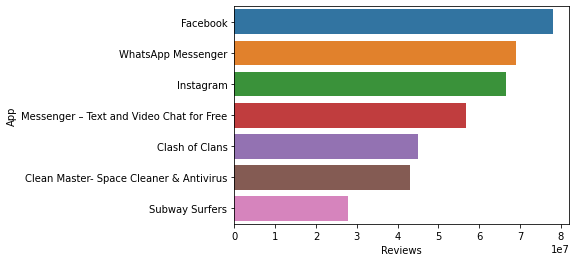

In [99]:
sort_r=df.sort_values(['Reviews'],ascending=0)[:15]
a=sns.barplot(x='Reviews',y='App',data=sort_r)